## testing with south sudan UCDP data 

timeline for [south sudanese conflict](https://concernusa.org/news/timeline-south-sudan-history/)

methods should look at 2013-2015 and post peace process

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv('../../data/ucdp/south_sudan.csv')
data.sort_values(by='date_start', inplace=True)

hm = pd.to_datetime(data['date_start']).dt.tz_localize('Africa/Juba').dt.tz_convert('UTC')

In [2]:
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:(i + window_size)].values)
        y.append(data.iloc[i + window_size])
    return np.array(X), np.array(y)

In [15]:
window_size = 4  # 4-6 seems to be ideal
X, y = create_sliding_window(data['best'], window_size)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1231.8182546391752


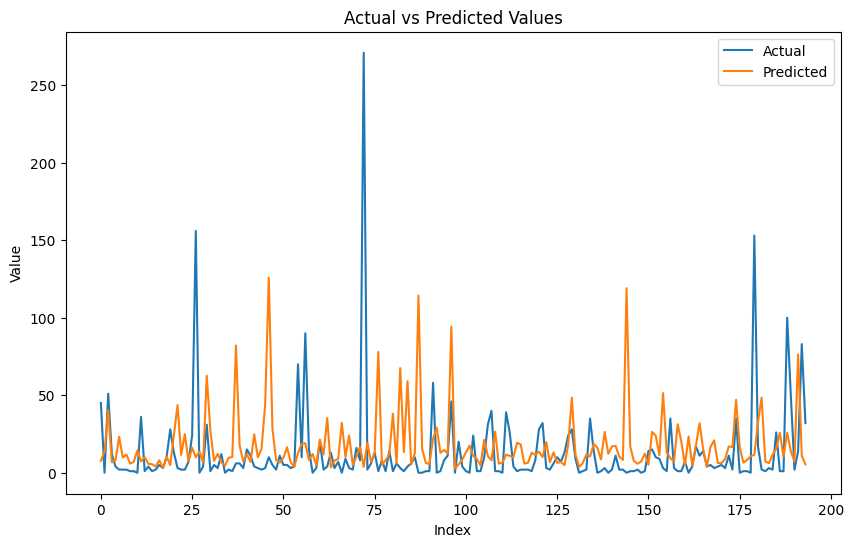

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
